### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# To Define path 
path = r'/Users/oluwaseunodusanya/Desktop/23.07.2023_Germany Apartment Rental Offer Analysis'

In [4]:
df_rental = pd.read_csv(os.path.join(path, '02 Data','02 Prepared Data','updated_clean_apartment_rental_data.csv'), index_col = False)

### 2. Data cleaning

In [5]:
df_rental.columns

Index(['Unnamed: 0', 'state', 'service charge', 'heating type',
       'telekom tv offer', 'newly constructed', 'balcony', 'picture count',
       'telekom upload speed', 'total rent', 'year constructed',
       'parking spaces', 'energy source', 'kitchen', 'cellar', 'base rent',
       'living space', 'condition of flat', 'interior qual', 'pets allowed',
       'lift', 'type of flat', 'number of rooms', 'energy need', 'floor',
       'garden', 'city/town', 'lastRefurbish', 'electricityBasePrice', 'date',
       'base rent offer', 'rental offer'],
      dtype='object')

In [6]:
# To print the first 20 rows
df_rental.head(20)

Unnamed: 0                state  service charge  \
0            0  Nordrhein_Westfalen          245.00   
1            1      Rheinland_Pfalz          134.00   
2            2              Sachsen          255.00   
3            3              Sachsen           58.15   
4            4               Bremen          138.00   
5            5   Schleswig_Holstein          142.00   
6            6              Sachsen           70.00   
7            7               Bremen           88.00   
8            8    Baden_Württemberg          110.00   
9            9  Nordrhein_Westfalen           95.00   
10          10              Sachsen           88.00   
11          11              Sachsen          155.00   
12          12      Rheinland_Pfalz          270.00   
13          13  Nordrhein_Westfalen          200.00   
14          14  Nordrhein_Westfalen          215.00   
15          15            Thüringen           80.00   
16          16               Hessen          220.00   
17          17              Sachsen           50.00   
18          18  Nordrhein_Westfalen          121.00   
19          19        Niedersachsen          290.00   

                      heating type telekom tv offer  newly constructed  \
0                  central_heating    ONE_YEAR_FREE              False   
1   self_contained_central_heating    ONE_YEAR_FREE              False   
2                    floor_heating    ONE_YEAR_FREE               True   
3                 district_heating    ONE_YEAR_FREE              False   
4   self_contained_central_heating    ONE_YEAR_FREE              False   
5                      gas_heating             NONE              False   
6   self_contained_central_heating    ONE_YEAR_FREE              False   
7                  central_heating    ONE_YEAR_FREE              False   
8                      oil_heating    ONE_YEAR_FREE              False   
9   self_contained_central_heating    ONE_YEAR_FREE              False   
10                 central_heating    ONE_YEAR_FREE              False   
11                 central_heating    ONE_YEAR_FREE              False   
12                     oil_heating             NONE              False   
13                 central_heating    ONE_YEAR_FREE              False   
14                     gas_heating    ONE_YEAR_FREE               True   
15                district_heating    ONE_YEAR_FREE              False   
16                     oil_heating    ONE_YEAR_FREE              False   
17                 central_heating    ONE_YEAR_FREE              False   
18                 central_heating    ONE_YEAR_FREE              False   
19                district_heating    ONE_YEAR_FREE              False   

    balcony  picture count  telekom upload speed   total rent  ...  \
0     False       6.000000                  10.0   840.000000  ...   
1      True       8.000000                  10.0   650.000000  ...   
2      True       8.000000                   2.4  1300.000000  ...   
3      True       9.000000                  40.0   650.000000  ...   
4      True      19.000000                  40.0   903.000000  ...   
5      True       5.000000                   2.4   650.000000  ...   
6     False       9.000000                   2.4   380.000000  ...   
7      True       5.000000                   2.4   584.250000  ...   
8     False       5.000000                  40.0   690.000000  ...   
9     False       7.000000                  40.0   650.000000  ...   
10     True      11.000000                  40.0   307.000000  ...   
11    False       9.000000                   2.4   555.000000  ...   
12    False       4.000000                   2.4   920.000000  ...   
13    False       3.000000                  40.0  1150.000000  ...   
14     True      12.000000                   2.4  1320.650000  ...   
15     True       5.000000                   2.4   300.000000  ...   
16     True      17.000000                  40.0   970.000000  ...   
17    False      12.000000       

In [7]:
# To drop unknown column
df_rental = df_rental.drop(columns = ['Unnamed: 0'])

In [8]:
# To print the number of rows and columns
df_rental.shape

(267080, 31)

In [9]:
# To Check for missing values

df_rental.isnull().sum()

# missing values were handled in the previous exercise

state                   0
service charge          0
heating type            0
telekom tv offer        0
newly constructed       0
balcony                 0
picture count           0
telekom upload speed    0
total rent              0
year constructed        0
parking spaces          0
energy source           0
kitchen                 0
cellar                  0
base rent               0
living space            0
condition of flat       0
interior qual           0
pets allowed            0
lift                    0
type of flat            0
number of rooms         0
energy need             0
floor                   0
garden                  0
city/town               0
lastRefurbish           0
electricityBasePrice    0
date                    0
base rent offer         0
rental offer            0
dtype: int64

In [10]:
# To check for duplicates
dups = df_rental.duplicated()

In [11]:
dups.shape # No dups

(267080,)

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_3857/4092403089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rental['total rent'], bins=20) # Shows extreme values


<Axes: xlabel='total rent', ylabel='Density'>

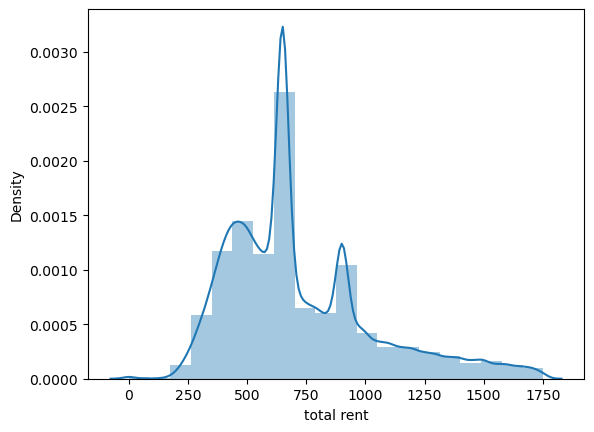

In [13]:
# To check for extreme values/outliers
sns.distplot(df_rental['total rent'], bins=20) # Shows extreme values
# outliers were addressed and inputed in previous exercise

In [14]:
# To print the summary statistics of variables
df_rental.describe()

service charge  picture count  telekom upload speed     total rent  \
count   267080.000000  267080.000000         267080.000000  267080.000000   
mean       140.652690       9.091315             30.139990     718.554618   
std         63.102184       4.936095             15.655535     311.812454   
min          0.000000       0.000000              1.000000       0.000000   
25%         96.000000       6.000000             10.000000     495.000000   
50%        135.000000       9.000000             40.000000     650.000000   
75%        179.000000      12.000000             40.000000     900.000000   
max        332.500000      23.000000             40.000000    1752.000000   

       year constructed  parking spaces      base rent   living space  \
count      267080.00000   267080.000000  267080.000000  267080.000000   
mean         1969.62593        1.113532     570.198651      69.519138   
std            32.71696        4.936142     296.227386      23.605479   
min          1881.00000        0.000000       0.000000       5.000000   
25%          1959.00000        1.000000     338.000000      54.020000   
50%          1972.00000        1.000000     490.000000      67.400000   
75%          1992.00000        1.000000     710.000000      82.460000   
max          2029.00000     2241.000000    1490.500000     136.500000   

       number of rooms    energy need          floor  lastRefurbish  \
count    267080.000000  267080.000000  267080.000000  267080.000000   
mean          2.546178     108.458209       2.097660    2016.075015   
std           0.841627      33.769828       3.278535       6.174785   
min           1.000000       0.100000      -1.000000    1015.000000   
25%           2.000000      98.000000       1.000000    2017.000000   
50%           2.642205     107.000000       2.000000    2017.000000   
75%           3.000000     114.846238       3.000000    2017.000000   
max           4.500000     233.000000     999.000000    2919.000000   

       electricityBasePrice  
count         267080.000000  
mean              90.473611  
std                2.335359  
min               71.430000  
25%               90.760000  
50%               90.760000  
75%               90.760000  
max               90.760000

In [ ]:
### 3. Data prep for regression analysis 

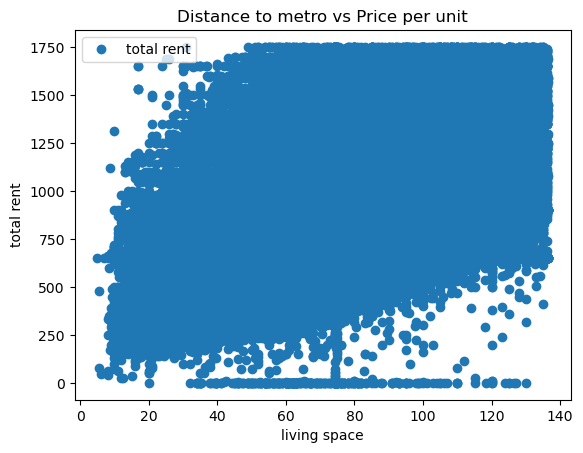

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_rental.plot(x = 'living space', y='total rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to metro vs Price per unit')  
plt.xlabel('living space')  
plt.ylabel('total rent')  
plt.show()

#### Hypothesis
'The higher the value of the living space of an apartment, the higher the total rent'

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_rental['living space'].values.reshape(-1,1)
y = df_rental['total rent'].values.reshape(-1,1)

In [17]:
X

array([[86. ],
       [89. ],
       [83.8],
       ...,
       [95. ],
       [70. ],
       [77. ]])

In [18]:
y

array([[ 840.],
       [ 650.],
       [1300.],
       ...,
       [ 930.],
       [1015.],
       [ 650.]])

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [20]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

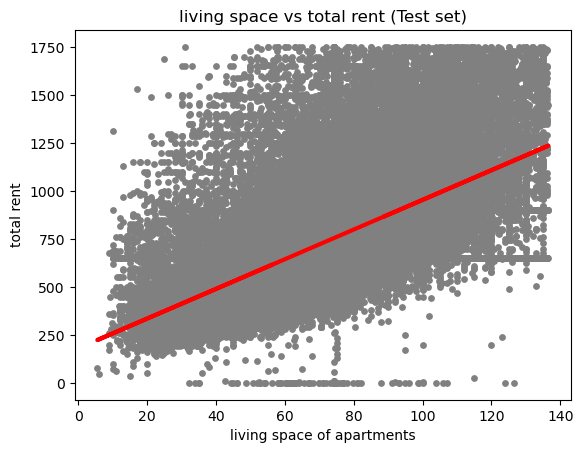

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('living space vs total rent (Test set)')
plot_test.xlabel('living space of apartments')
plot_test.ylabel('total rent')
plot_test.show()

#### The red line represents the regression line. The linear model represented by the red regression line fit most of the data points.  There were still data points that had low values of living space but high total rent, so this model appear not to fit perfectly

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7.73432474]]
Mean squared error:  63738.67297186862
R2 score:  0.34675179497338493


#### A positive slope was indicated by the regresson line, hence a positive relationship between the variables being explored (as living space value increases, total rent increases at a degree of 7.734). Looking at the root mean squared error, the result indicates a large distance between the regression line and the data points indicating that the regression line is not an accurate representation of data. It’s safe to say that a regression may not be the best model to represent this data and can’t accurately predict the influence of living space on the total rent of apartments. The R2 also indicates that the model is not a best fit as it only tell us that how the model explains the variance in the data is about 35%. 

In [26]:
y_predicted

array([[614.12691459],
       [580.71463171],
       [792.01638367],
       ...,
       [672.5210664 ],
       [799.75070841],
       [869.35963109]])

In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual    Predicted
0    650.00   614.126915
1    341.40   580.714632
2    912.00   792.016384
3    599.00   780.105524
4    655.00   822.953683
5    961.50   852.885519
6    634.00   691.470162
7    785.00   620.314374
8    351.00   542.275038
9    650.00   993.108827
10   923.01   628.203386
11   370.00   645.064214
12   580.00   722.407461
13   705.00   803.308498
14   430.00   606.392590
15   418.00   676.001513
16   408.43   633.772099
17   530.00   715.446569
18   385.00   649.704808
19  1070.00   974.546448
20   435.00   581.024005
21   309.00   536.783667
22   650.00   670.742172
23   502.00   679.095242
24   650.00   761.079085
25   650.00   993.108827
26   960.47   979.805788
27  1220.00   645.064214
28   480.00   644.986870
29  1500.00  1109.123698

#### This just adds evidence to the fact that the model isn’t doing a great job of explaining the relationship between the living space and total rent variables. The relationship simply doesn’t follow a single, straight regression line (so a single, straight regression line won’t be able to accurately predict anything)

In [28]:
##### Compare how the regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7.73432474]]
Mean squared error:  63759.65047559478
R2 score:  0.3432155367543219


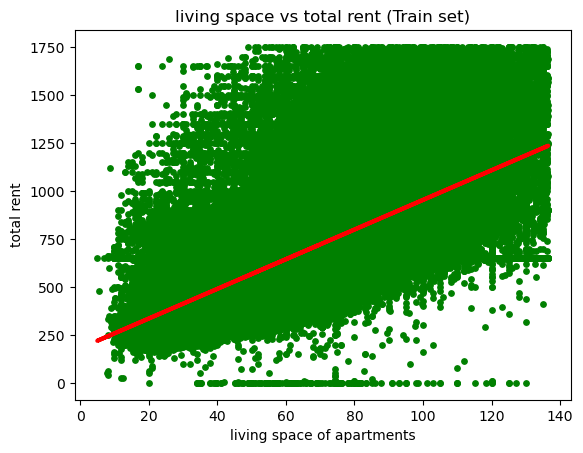

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('living space vs total rent (Train set)')
plot_test.xlabel('living space of apartments')
plot_test.ylabel('total rent')
plot_test.show()

#### Impact of possible Bias
Result of model on training set is similar to that of test set. So it's safe to say the model doesn't fit fo this data set. The hypothesis assumes a linear relationship between living space and total rent. However, the relationship might be nonlinear, which means that the increase in total rent might not be directly proportional to the increase in living space. A nonlinear regression techniques might be helpful to capture this relationship